In [19]:
# !pip install geocoder
import tweepy

from tweepy.streaming import StreamListener
from tweepy import OAuthHandler 
from tweepy import Stream
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Secret Credentials 
ACCESS_TOKEN = "500435442-ZsyX0WGAgAsiK3mPMwCLVZgXaM4mPeLpOZHh46Uc"
ACCESS_TOKEN_SECRET = "tI6pbzVsXWzNmfUEC07by6ZpJc5d58vu0sKxovxuDQEoY"
CONSUMER_KEY = "zazEfoGYmcJp8IZCQZYeleORe"
CONSUMER_SECRET = "JtTfz6C4WaCNZkzmn02U4GkOoilCyiIVKFFknuLgWD51MeVySm"

In [3]:
auth=OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)
api=tweepy.API(auth)

In [4]:
tweets=[]
retweet=[]
likes=[]

In [5]:
#input from website 
user_input='CA'
userx=['SkyNews','ABC','9NewsMelb','dailytelegraph']

In [6]:
# a=tweepy.Cursor(api.user_timeline,id=userx).items(200)
# a=list(a)
data=[]
for i in range(len(userx)):
    searched_tweets = [status for status in tweepy.Cursor(api.user_timeline,id=userx[i]).items(200)]
    tweets=[]
    for i in searched_tweets:
        tweets.append(i.text)
    data.append(tweets)
    

In [7]:
# Twitter_df2=pd.DataFrame({'tweets':tweets,'likes':likes,'retweet':retweet})
# Twitter_df2

In [8]:



#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("NEW_softmax.pkl","rb"))




In [9]:
news_category=[]

In [10]:
for i in range(len(data)):
    for j in range(len(data[i])):
        X_new_counts = loaded_vec.transform([data[i][j]])
        X_new_tfidf = loaded_tfidf.transform(X_new_counts)
        predicted = loaded_model.predict(X_new_tfidf)
        news_category.append(predicted)





In [11]:
from itertools import islice

def chunk(it, size):
    it = iter(it)
    return iter(lambda: tuple(islice(it, size)), ())



In [12]:
x=[]
for i in range(len(news_category)):
    x.append(news_category[i][0])
    
cumulative_count=[]
set_x=list(set(x))

for j in range(len(set_x)):
    cumulative_count.append(x.count(set_x[j]))


# c1=x[0:200]
# c2=x[200:400]
# c3=x[400:600]

In [13]:
import numpy as np 
N_c=list(chunk(x, 200))


In [14]:
# set_x=list(set(x))
# set_x_count1=[]
# set_x_count2=[]
# set_x_count3=[]

In [15]:
count_y=[]

for i in range(len(N_c)):
    count=[]
    for j in range(len(set_x)):
        count.append(N_c[i].count(set_x[j]))
    count_y.append(count)

In [16]:
# list1=[]
# for i in range(len(count_y)):
#     list1.append([userx[i],count_y[i]])
# df=pd.DataFrame(list1,columns=['Name','Values'])

In [17]:
# Tweet_Uni=dict(zip(set_x,set_x_count))
# count1=list(Tweet_Uni.values())
# size1=[]
# for i in count1:
#     size1.append(i)

# colours=[]
# c=120
# for i in range(len(count1)):
#     c=c+2
#     colours.append(c)



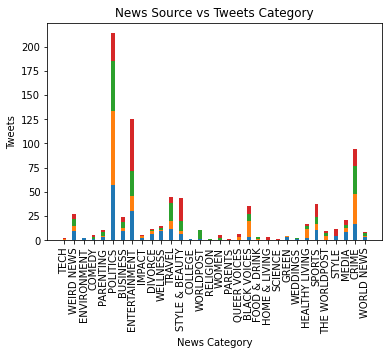

In [20]:
# w=0.4

# for i in range(len(count_y)):
#     plt.bar(set_x, count_y[i],w,bottom = np.sum(count_y[:i], axis = 0))
#     plt.xlabel('News Category')
#     plt.ylabel('Tweets')
#     plt.title('News Source vs Tweets Category')
#     plt.xticks(rotation=90)
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt


# plt.bar(set_x,count_y[0],w)
# plt.bar(set_x,count_y[1],w,bottom=count_y[0])
# plt.bar(set_x,count_y[2],w,bottom=count_y[0])

# plt.xlabel('News Category')
# plt.ylabel('Tweets')
# plt.title('News Source vs Tweets Category')
# plt.xticks(rotation=90)
# plt.legend()
# plt.show()

No handles with labels found to put in legend.


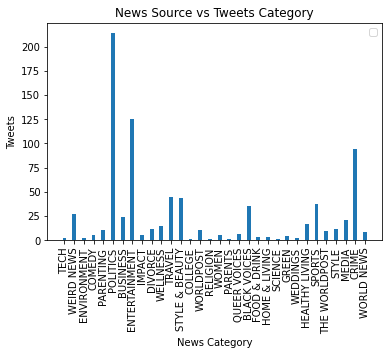

In [21]:
# plt.bar(set_x,cumulative_count,w)
# plt.xlabel('News Category')
# plt.ylabel('Tweets')
# plt.title('News Source vs Tweets Category')
# plt.xticks(rotation=90)
# plt.legend()
# plt.show()

In [50]:
# # !pip install plotly
# import plotly.graph_objects as go

# fig1 = go.Figure(data=[go.Scatter(
#     x=set_x,
#     y=cumulative_count,
#     mode='markers',
#     marker=dict(
#         color=colours,
#         size=size1,
#         showscale=True
#         )
# )])
# fig1.show()

# bar1=[set_x,set_x_count]

In [ ]:
# # !pip install plotly
# import plotly.graph_objects as go

# fig2 = go.Figure(data=[go.Scatter(
#     x=set_x,
#     y=set_x_count,
#     mode='markers',
#     marker=dict(
#         color=colours,
#         size=size1,
#         showscale=True
#         )
# )])
# fig2.show()

# bar2=[set_x,set_x_count]

In [ ]:
# # !pip install seaborn
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.pyplot as figure
# df1=pd.DataFrame({'x':bar1[0],'y':bar1[1]})
# df2=pd.DataFrame({'x':bar2[0],'y':bar2[1]})

# df1['hue']='Skynews'
# df2['hue']='ABC'

# combined=pd.concat([df1,df2])

# a4_dims = (11.7, 8.27)
# fig, ax = plt.subplots(figsize=a4_dims)
# g=sns.barplot(ax=ax,x='x',y='y',data=combined,hue='hue')
# plt.setp(g.get_xticklabels(), rotation=90)
# plt.show()


In [ ]:
# figx.show()

In [ ]:
# !pip install -U kaleido
# !conda install psutil

In [ ]:
# fig.write_image("yourfile.png") 

In [91]:
import json
data = {}
df=pd.DataFrame()
df['category']=set_x

if user_input=='CA':
    data=dict(zip(set_x,cumulative_count))
    json_data = json.dumps(data)
else:
    for i in range(len(count_y)):
        df['value_'+format(i)]=count_y[i]
    json_data=df.to_json(orient='records', lines=True)




In [93]:
# for i in range(len(count_y)):
#     data=dict(zip(set_x,count_y[i]))


In [94]:
# df=pd.DataFrame()
# df['category']=set_x
# df['cat_'+format(i)]=count_y[0]
# df

In [95]:
# # import matplotlib.pyplot as plt
# # plt.scatter(set_x, set_x_count, s=size1,c=colours

# i=1
# s='cat_'+format({i})
# s

In [ ]:
# plt.to_json('json_file.json')

In [ ]:
# plt.scatter(
#     x = set_x, 
#     y = set_x_count, 
#     s=size1, 
#     c=colours, 
#     cmap="Accent", 
#     alpha=0.6, 
#     edgecolors="white", 
#     linewidth=2);
 
# plt.xlabel("News Category")
# plt.ylabel("Frequency")
# plt.title("TWITTER ANALYSIS")
# plt.ylim(0,200)



In [ ]:
# plt.savefig(fname='fig2.png')


### NEW EXPLORATION -- whats trending

In [37]:
import sys
import geocoder
# Available Locations
available_loc = api.trends_available()
    # Trends for Specific Country
loc = sys.argv[1]     # location as argument variable 
g = geocoder.osm(loc) # getting object that has location's latitude and longitude

closest_loc = api.trends_closest(g.lat, g.lng)
trends = api.trends_place(closest_loc[0]['woeid'])


In [38]:
trends2=trends[0]['trends'][:10]
for i in range(len(trends2)):
    print('####################################')
    print(trends2[i]['name'])
    popular_tweets=[]
    popular_tweets = api.search(q=trends2[i]['name'], result_type='popular')
    for j in range(len(popular_tweets)):
        print("\n"+popular_tweets[j].text)
        print("\nBy--  "+popular_tweets[j].user.name)
        
    print('----------------------------------------------------')


####################################
#CriticalRoleSpoilers

Please enjoy last week's musical stylings of @samriegel and @Marisha_Ray! #CriticalRoleSpoilers https://t.co/yfg9Bti9vA

By--  Critical Role
----------------------------------------------------
####################################
Godmorgon
----------------------------------------------------
####################################
Lena Hallengren

Sweden's government has never had a formal strategy for handling the coronavirus pandemic, the country's health min… https://t.co/UtyvvcMIzc

By--  The Local Sweden
----------------------------------------------------
####################################
Grattis

Grattis Daniela och Chile till OS-platsen!

By--  Djurgården Fotboll

För 132 år sedan bildades det som blev grunden till Hammarby IF - Hammarby Rodd! Hammarby Rodd har i dag sin bas vi… https://t.co/eFDvm0n1dk

By--  Hammarby Fotboll

Grattis till OS-platsen, Daniela Zamora! 🇨🇱 https://t.co/y94QKi2u60

By--  Djurgården Fotbol